### ***Fastag Fraud Detection:***

##### ***Life Cycle:***

- Understanding the Problem Statement..
- Data Collection..
- Exploratory Data Analysis..
- Data Preprocessing..
- Model Training..
- Choose best model..

###***1) probelm Statment:***
- Developing the accurate and efficient for Fastag fraud...

###***2) Data Collection:***
- DataSet Source: https://www.kaggle.com/datasets/thegoanpanda/fastag-fraud-detection-datesets-fictitious
- This Data Contains 5000 rows and 13 columns.

### ***Importing the data Required Packages:***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/FastagFraudDetection.csv",parse_dates=['Timestamp'])
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2023-01-01 22:18:00,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,2023-01-17 13:43:00,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2023-02-05 05:08:00,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2023-02-20 20:34:00,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [3]:
# information:
def Info(df):

  # Total Records:
  print(f"Total Records are:{df.shape}\n")
  print(f"The columns are:\n{df.columns}\n")
  print(f"Total columns are:{df.shape[1]}\n")
  print("*"*170)

  # lets see the info and null values:

  print("Info:\n")
  print(f"{df.info()}\n")
  print(f"Null Values:\n{df.isnull().sum()}\n")
  print("*"*170)

  # lets see the data is in proportion or not:
  print(f"Output data is in proportion or not:\n{df.Fraud_indicator.value_counts(normalize=True)*100}\n")

Info(df)

Total Records are:(5000, 13)

The columns are:
Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

Total columns are:13

**************************************************************************************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         5000 non-null   int64         
 1   Timestamp              5000 non-null   datetime64[ns]
 2   Vehicle_Type           5000 non-null   object        
 3   FastagID               4451 non-null   object        
 4   Toll

In [ ]:
# lets know the data by pandas profiling:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b854d9eebd553a5101644e2b4fcc8d810b16911cfeb360d1c8f985a757b987da
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's depende

In [ ]:
!pip install --upgrade typing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=53a25f3f65c6e14aeea7f18ca52b31868197a3cd1ba3e921f6d4f5be11fbc851
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
report = ProfileReport(df)
report.to_file("fastag_fraud.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- ***Dealig with Duplicate Values..***

In [4]:
# lets chcek the duplicates values in id:
df.FastagID.duplicated().sum()

548

In [5]:
# if we wants to check the reocord of duplicates ids:
df[df.FastagID.duplicated()]

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
9,10,2023-01-15 07:30:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud
16,17,2023-01-22 16:45:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",62,KA20GH1345,Not Fraud
23,24,2023-01-29 03:05:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",77,KA77UV0123,Not Fraud
30,31,2023-02-05 13:20:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",57,KA92IJ5789,Not Fraud
37,38,2023-02-12 23:35:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",85,KA15IJ6789,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4967,2023-08-31 06:08:00,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",47,AP34MN6789,Not Fraud
4973,4974,2023-12-27 19:04:00,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",84,AP01AB4567,Not Fraud
4980,4981,2023-04-20 06:01:00,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",74,AP78OP2345,Not Fraud
4987,4988,2023-08-19 18:57:00,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",90,AP45CD0123,Not Fraud


- ***Motorcycle wont require the Fastag ID So we initializze them with Not Required..***

In [6]:
# just fill the fastag id of people who drives motorcycle with Not specified or Not required....
df.FastagID = df.FastagID.fillna("Not Required")

In [7]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

### ***EDA:***

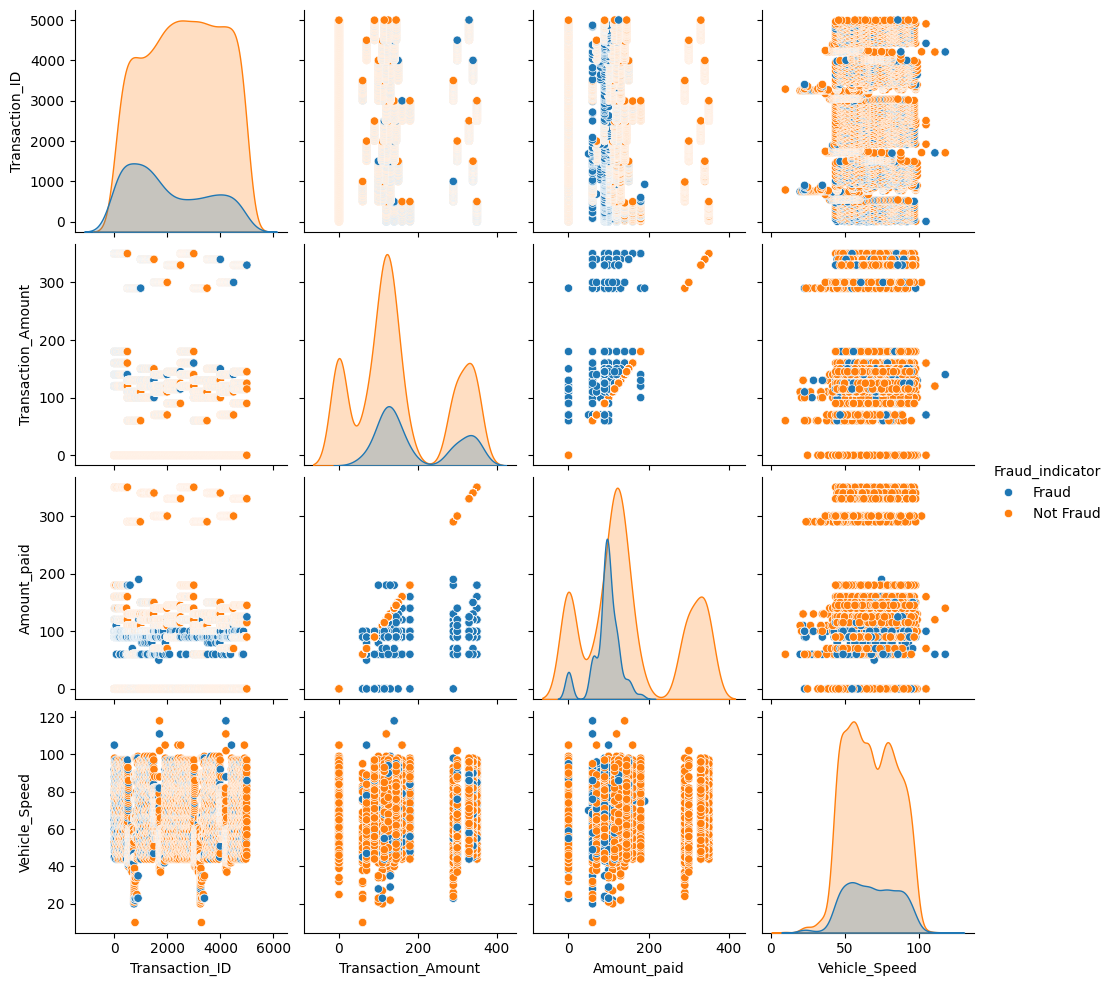

In [ ]:
# lets see the pairplot:
sns.pairplot(data=df,hue="Fraud_indicator")

<Axes: >

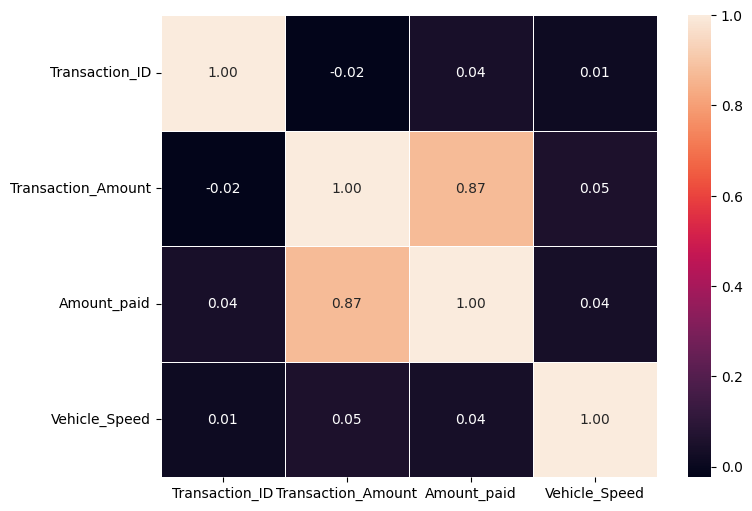

In [8]:
# lets see the correlation between each input fetures:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(),annot=True,fmt=".2f",linewidth=0.6)

Here we have high correlation between Amount Paid and Transaction Amount

If we see the scatter plot we are getting that we have multiple outliers available in this dataset

So to reduce it we have to drop one column or we need to perform feature engineering, extracctio or construction



<Axes: xlabel='Transaction_Amount', ylabel='Amount_paid'>

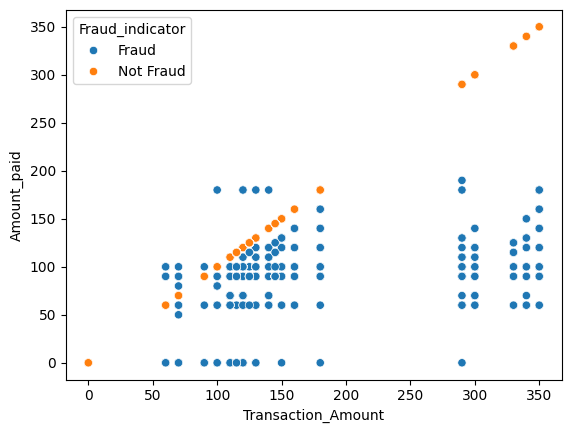

In [9]:
print(f"Here we have high correlation between Amount Paid and Transaction Amount\n")
print(f"If we see the scatter plot we are getting that we have multiple outliers available in this dataset\n")
print(f"So to reduce it we have to drop one column or we need to perform feature engineering, extracctio or construction\n")
sns.scatterplot(data=df,x="Transaction_Amount",y="Amount_paid",hue="Fraud_indicator")

<Axes: >

<Figure size 1200x400 with 0 Axes>

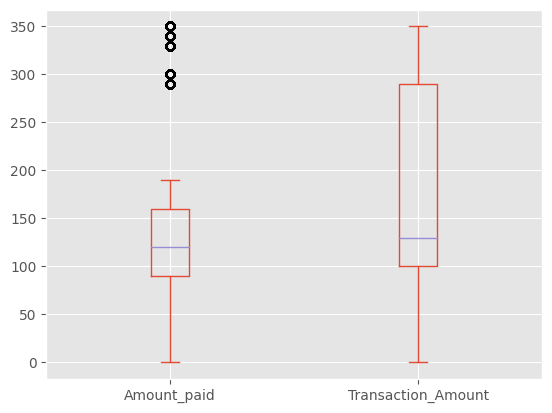

In [10]:
plt.style.use("ggplot")
plt.figure(figsize=(12,4))
df[['Amount_paid','Transaction_Amount']].plot(kind='box')

In [8]:
# lets divide the Timestamp columns to check the fraudulent:
df.insert(1,"Hour",df['Timestamp'].dt.hour)

In [9]:
df.insert(2,"Month",df['Timestamp'].dt.month)
df.insert(3,"DayOfWeek",df['Timestamp'].dt.dayofweek)

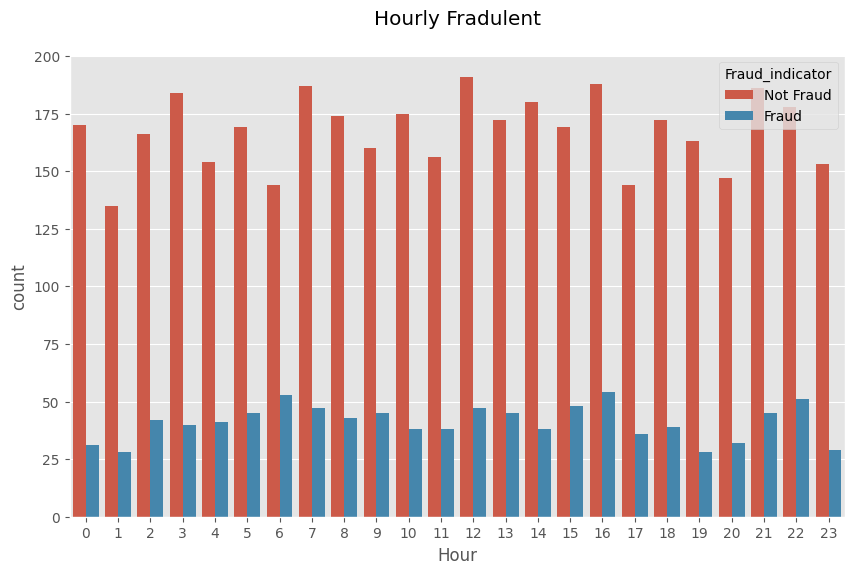

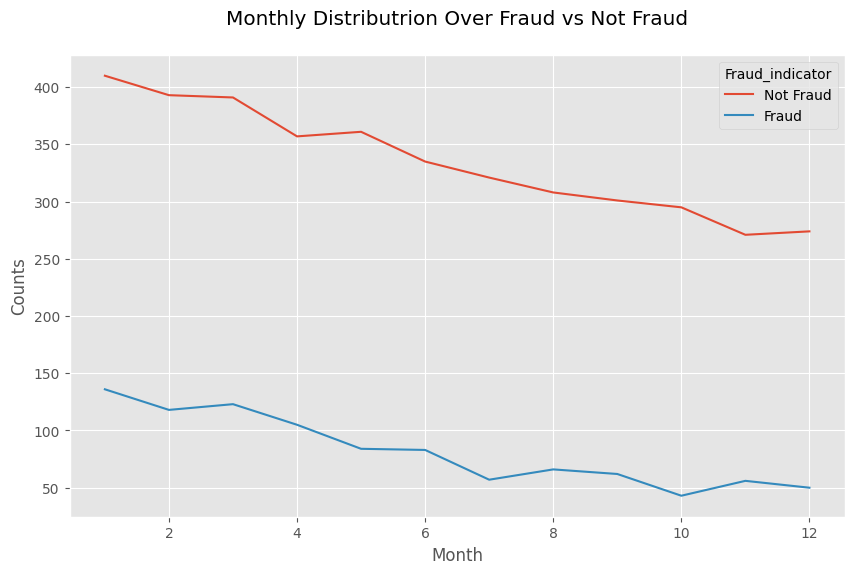

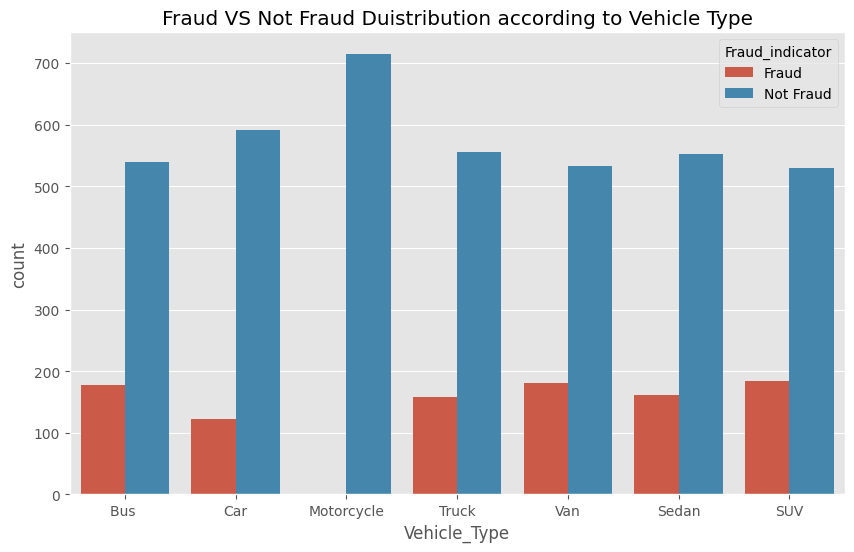

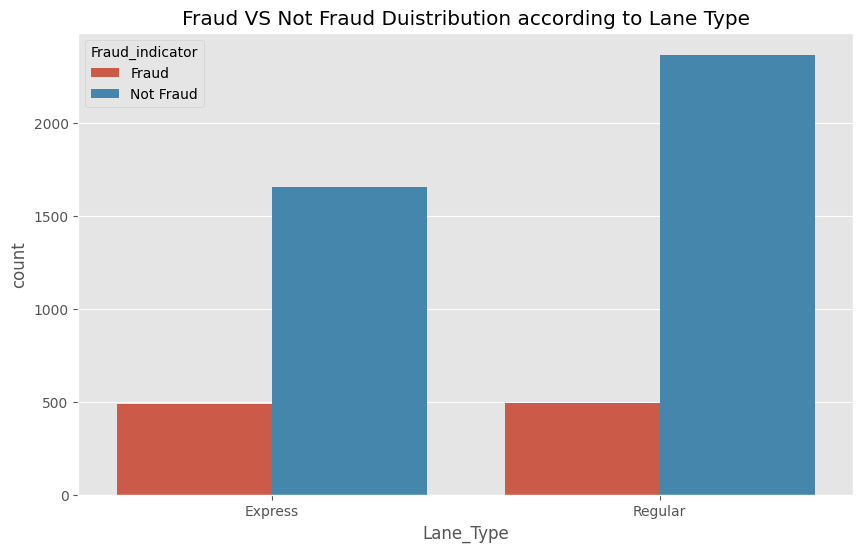

In [ ]:
# lets check the Hourly Frauduelnt:
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Hour",hue="Fraud_indicator")
plt.title("Hourly Fradulent\n")
plt.show()

# lets check the Fraudulent rate in each month:
plt.figure(figsize=(10,6))
Monthly_Fraudulent = df.groupby("Month")[['Fraud_indicator']].value_counts().reset_index(name="Counts")
sns.lineplot(data=Monthly_Fraudulent,x="Month",y="Counts",hue="Fraud_indicator")
plt.title("Monthly Distributrion Over Fraud vs Not Fraud\n")
plt.show()

# lets check the Fraud vs Not Fraud distribtion over Vehicle type
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Vehicle_Type",hue="Fraud_indicator")
plt.title("Fraud VS Not Fraud Duistribution according to Vehicle Type")
plt.show()

# lets check the Fraud vs Not Fraud distribtion over Lane type
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Lane_Type",hue="Fraud_indicator")
plt.title("Fraud VS Not Fraud Duistribution according to Lane Type")
plt.show()

<Axes: title={'center': 'Fraudulent over Amount paid'}, xlabel='Amount_paid', ylabel='Count'>

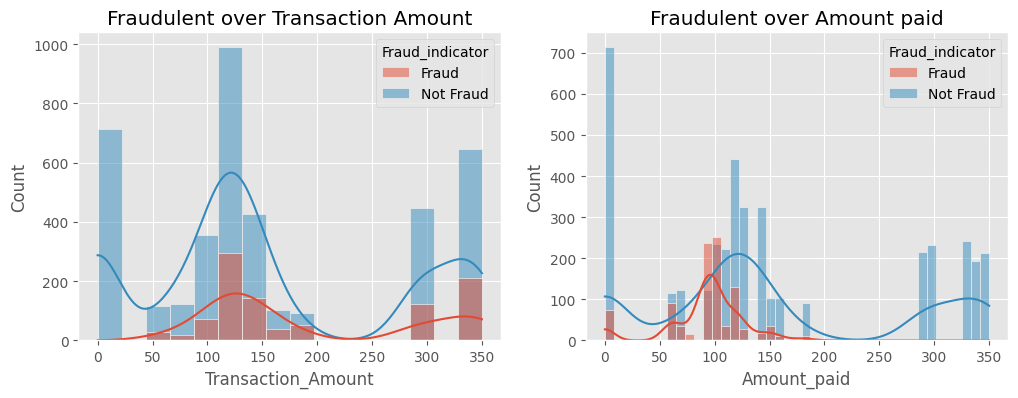

In [13]:
# lets see the Fraudulent Rate over Transcation Aount and Amount paid:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))
ax1.set_title("Fraudulent over Transaction Amount")
sns.histplot(data=df,x="Transaction_Amount",hue="Fraud_indicator",ax=ax1,kde=True)
ax2.set_title("Fraudulent over Amount paid")
sns.histplot(data=df,x="Amount_paid",hue="Fraud_indicator",ax=ax2,kde=True)

### ***Conclusion:***
- from above plot we get that Amount paid has skewed data and it has outliers..
- So on that outliers point or on that amount above 280 there will be no frau done so we can trim them or we can do capping...with use of IQR method..

In [10]:
for i in ['Amount_paid']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  # lets take the range...
  upper_range = Q3 + 1.5 * IQR
  lower_range = Q1 - 1.5 * IQR

  df[i] = np.where(df[i] > upper_range , upper_range,df[i])
  df[i] = np.where(df[i] < lower_range , lower_range,df[i])

<Axes: xlabel='Transaction_Amount'>

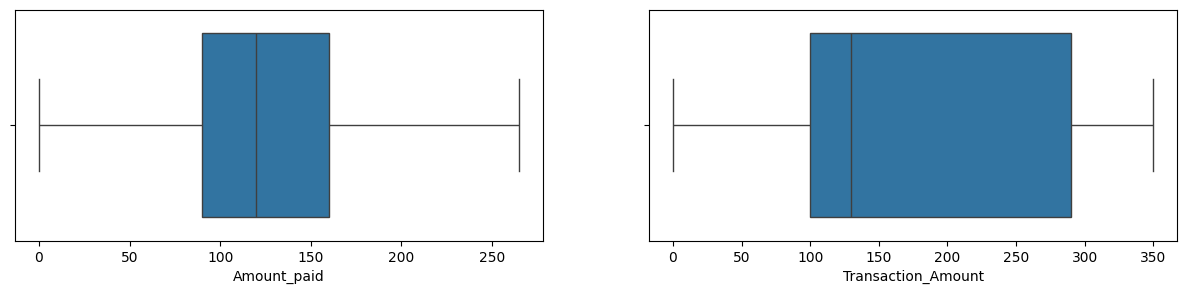

In [11]:
# now lets check the outliers:
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.boxplot(data=df,x="Amount_paid")
plt.subplot(122)
sns.boxplot(data=df,x="Transaction_Amount")

In [12]:
# here lets fetch catgeorical columns :
cat_col = df.select_dtypes(object)
cat_col.columns

Index(['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type',
       'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number',
       'Fraud_indicator'],
      dtype='object')

In [13]:
# lets see the unqiue catgeoreis we have present under the features:
for i in cat_col.drop(columns=['FastagID','Geographical_Location','Vehicle_Plate_Number','TollBoothID']).columns:
  print(i,df[i].unique(),sep=": ")

Vehicle_Type: ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Lane_Type: ['Express' 'Regular']
Vehicle_Dimensions: ['Large' 'Small' 'Medium']
Fraud_indicator: ['Fraud' 'Not Fraud']


- Lets see the distribution of each categories...

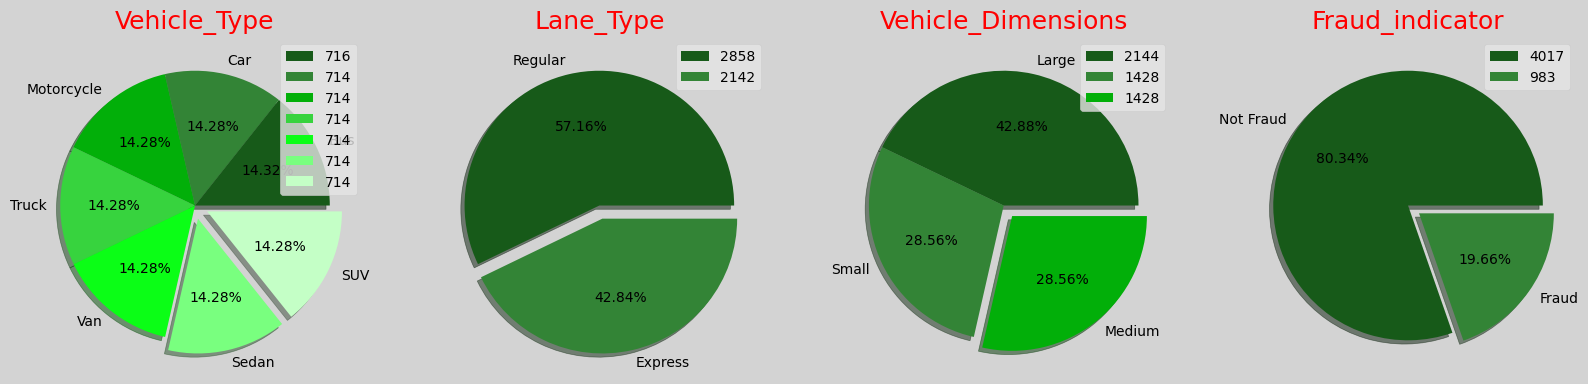

In [ ]:
fig,axs = plt.subplots(1,4,figsize=(20,6),facecolor="lightgray")
colors = [('#175A19','#338436',"#02AF09","#37D33E","#0BFE16","#79FF7F","#C4FFC6"),('#175A19','#338436'),('#175A19','#338436',"#02AF09"),('#175A19','#338436')]
explode = [(0,0,0,0,0,0.1,0.1),(0,0.1),(0,0,0.1),(0,0.1)]
for i,col in enumerate(cat_col.drop(columns=['FastagID','Geographical_Location','Vehicle_Plate_Number','TollBoothID']).columns):
  ax = axs[i]
  res = cat_col[col].value_counts()
  ax.pie(res,autopct="%.2f%%",labels=res.index,colors=colors[i],explode=explode[i],shadow=True)
  ax.legend(res.values)
  ax.set_title(col,color="red",size=18)

In [14]:
# lets fetch numerical columns:
num_col = df.select_dtypes([int,float])
num_col.columns

Index(['Transaction_ID', 'Hour', 'Month', 'DayOfWeek', 'Transaction_Amount',
       'Amount_paid', 'Vehicle_Speed'],
      dtype='object')

In [15]:
# we have python approach to get the cat and numerical columns inside a list:
cat = [i for i in df.columns if df[i].dtypes == "O"]

num = [i for i in df.columns if i not in cat]
cat,num

(['Vehicle_Type',
  'FastagID',
  'TollBoothID',
  'Lane_Type',
  'Vehicle_Dimensions',
  'Geographical_Location',
  'Vehicle_Plate_Number',
  'Fraud_indicator'],
 ['Transaction_ID',
  'Hour',
  'Month',
  'DayOfWeek',
  'Timestamp',
  'Transaction_Amount',
  'Amount_paid',
  'Vehicle_Speed'])

In [16]:
df.head()

,Transaction_ID,Hour,Month,DayOfWeek,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,11,1,4,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120.0,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,14,1,5,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100.0,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,18,1,6,2023-01-08 18:25:00,Motorcycle,Not Required,D-104,Regular,Small,0,0.0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,2,1,0,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120.0,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,6,1,1,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100.0,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [20]:
X = df.drop(columns=['Fraud_indicator','Vehicle_Plate_Number','Timestamp','Transaction_ID'])
y = df['Fraud_indicator']

In [21]:
# lets split the data:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
y_train.value_counts(normalize=True)*100

Not Fraud    80.346667
Fraud        19.653333
Name: Fraud_indicator, dtype: float64

In [23]:
# we have the Nominal Categorical data only so we can use one hot encoding:
# lets import libraries for one hot encoding and for output coolumn we use label encoder:
from sklearn.preprocessing import LabelEncoder,RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [24]:
transform = ColumnTransformer(transformers=[
    ("tnf1",OneHotEncoder(drop="first",sparse=True),['Vehicle_Type','FastagID','TollBoothID','Lane_Type','Vehicle_Dimensions','Geographical_Location']),
    ("tnf2",RobustScaler(),['Transaction_Amount','Amount_paid'])
],remainder="passthrough")

In [25]:
transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1',
                                 OneHotEncoder(drop='first', sparse=True),
                                 ['Vehicle_Type', 'FastagID', 'TollBoothID',
                                  'Lane_Type', 'Vehicle_Dimensions',
                                  'Geographical_Location']),
                                ('tnf2', RobustScaler(),
                                 ['Transaction_Amount', 'Amount_paid'])])

In [26]:
x_train_np = transform.fit_transform(x_train)
x_test_np = transform.fit_transform(x_test)

In [27]:
encode = LabelEncoder()

y_test_np = encode.fit_transform(y_test)
y_train_np = encode.fit_transform(y_train)

In [23]:
encode.classes_

array(['Fraud', 'Not Fraud'], dtype=object)

###***SMOTE:***
- Synthetic Minority Over Sampling Technique
- Basically used to increase number of insatnces of Minority class.
- SMOTE does not duplicates the existing instances instead it geneartes new instances by considering relation with existing instances:
- Here no chance of Raising the Dupilcates or False Positives:

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
st = SMOTE()
st

SMOTE()

In [30]:
x_resampled,y_resampled = st.fit_resample(x_train_np,y_train_np)

In [31]:
y_resampled[y_resampled == 1].shape,y_resampled[y_resampled == 0].shape # here we are getting the data in porportion:

((3013,), (3013,))

In [32]:
# noe agai split the data :
X_train,X_test,Y_train,Y_test = train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [34]:
# lets build the model:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score

In [35]:
def Model_Eval(X_train,Y_train,X_test,Y_test_test):

  classifiers =[
      LogisticRegression(),
      RandomForestClassifier(),
      BernoulliNB(),
      DecisionTreeClassifier(),
      GradientBoostingClassifier(learning_rate=0.1,n_estimators=500,max_depth=5),

  ]

  class_names = [
      "LogisticRgerssion",
      "RandomforestClf",
      "Benoulli",
      "DecisionTreeClf",
      "GradientBoost",
  ]

  Metrics = pd.DataFrame(columns=['Accuracy','Recall','Precision','f1'])

  for i,clf in enumerate(classifiers):

    clf.fit(X_train,Y_train)

    Y_pred = clf.predict(X_test)

    # performance of metrics:

    Accuracy = accuracy_score(Y_test,Y_pred)*100
    Precision = precision_score(Y_test,Y_pred)*100
    Recall = recall_score(Y_test,Y_pred)*100
    f1 = f1_score(Y_test,Y_pred)*100

    Metrics.loc[class_names[i],"Accuracy"] = Accuracy
    Metrics.loc[class_names[i],"Recall"] = Recall
    Metrics.loc[class_names[i],"Precision"] = Precision
    Metrics.loc[class_names[i],"f1"] = f1

  Metrics = Metrics.sort_values(by="Accuracy",ascending=False)

  return Metrics
Metrics = Model_Eval(X_train,Y_train,X_test,Y_test)

In [36]:
Metrics

,Accuracy,Recall,Precision,f1
GradientBoost,99.280973,100.0,98.611111,99.300699
RandomforestClf,98.783186,100.0,97.671958,98.82227
DecisionTreeClf,98.783186,100.0,97.671958,98.82227
LogisticRgerssion,98.451327,100.0,97.055731,98.50587
Benoulli,92.754425,91.224269,94.394619,92.782369


- Now lets chcek the performance of model over XGBClassifier by applying GridSearch on it...

In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "learning_rate":[0.1,0.01,0.001],
    "n_estimators":[100,300,500],
    "max_depth":[3,5,7]
}

grid = GridSearchCV(estimator=XGBClassifier(),param_grid=params,scoring="accuracy",cv=10)

grid.fit(X_train,Y_train)

Y_pred = grid.predict(X_test)

print("Accuracy",accuracy_score(Y_test,Y_pred)*100)
print("Classifiaction Report",classification_report(Y_test,Y_pred))
print("Best Params",grid.best_params_)

Accuracy 99.50221238938053
Classifiaction Report               precision    recall  f1-score   support

           0       1.00      0.99      0.99       887
           1       0.99      1.00      1.00       921

    accuracy                           1.00      1808
   macro avg       1.00      0.99      1.00      1808
weighted avg       1.00      1.00      1.00      1808

Best Params {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


### ***Building the Pipeline for Best Model:***

In [37]:
X[:2]

,Hour,Month,DayOfWeek,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed
0,11,1,4,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120.0,"13.059816123454882, 77.77068662374292",65
1,14,1,5,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100.0,"13.059816123454882, 77.77068662374292",78


In [39]:
y[:2]

0    Fraud
1    Fraud
Name: Fraud_indicator, dtype: object

In [41]:
for i in X.select_dtypes(object).columns:
  print(i,df[i].unique(),sep=": ")

Vehicle_Type: ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
FastagID: ['FTG-001-ABC-121' 'FTG-002-XYZ-451' 'Not Required' ... 'FTG-447-PLN-109'
 'FTG-458-VFR-876' 'FTG-459-WSX-543']
TollBoothID: ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Lane_Type: ['Express' 'Regular']
Vehicle_Dimensions: ['Large' 'Small' 'Medium']
Geographical_Location: ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


### ***Label Encoding:***

In [51]:
for i in cat_col.drop(columns=['Fraud_indicator','Vehicle_Plate_Number']).columns:
  X[i] = encode.fit_transform(X[i])

In [57]:
X[:2]

,Hour,Month,DayOfWeek,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed
0,11,1,4,0,2,0,0,0,350,120.0,3,65
1,14,1,5,1,9,1,1,2,120,100.0,3,78


In [53]:
y = encode.fit_transform(y)

In [54]:
y

array([0, 0, 1, ..., 1, 1, 0])

In [55]:
encode.classes_

array(['Fraud', 'Not Fraud'], dtype=object)

### ***Data Balancing:***
- ***smote:***

In [58]:
A_resampled,b_resampled = st.fit_resample(X,y)

### ***Data Splitting:***

In [59]:
x3_train,x3_test,y3_train,y3_test = train_test_split(A_resampled,b_resampled,test_size=0.2)

In [60]:
trf1 = ColumnTransformer(transformers=[
    ("tnf2",RobustScaler(),['Transaction_Amount','Amount_paid'])
],remainder="passthrough")

In [61]:
trf2 = XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=300)
trf2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
# make a pipeline..
Fastag_XGBC_pipe = make_pipeline(trf1,trf2)

In [63]:
# for chceking the how it will gives robust scaled values ten first we have to set config
from sklearn import set_config
set_config(display="diagram")

In [58]:
Fastag_XGBC_pipe.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('tnf2', RobustScaler(),
                                  ['Transaction_Amount', 'Amount_paid'])]),
 'xgbclassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=300, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)}

In [64]:
Fastag_XGBC_pipe.fit(x3_train,y3_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2', RobustScaler(),
                                                  ['Transaction_Amount',
                                                   'Amount_paid'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categ...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [65]:
Fastag_XGBC_pipe.score(x3_train,y3_train)*100

100.0

In [66]:
y3_pred = Fastag_XGBC_pipe.predict(x3_test)

In [67]:
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       810
           1       1.00      1.00      1.00       797

    accuracy                           1.00      1607
   macro avg       1.00      1.00      1.00      1607
weighted avg       1.00      1.00      1.00      1607



<Axes: >

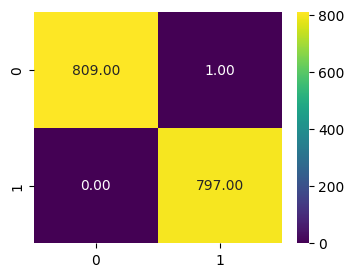

In [68]:
plt.figure(figsize=(4,3))
sns.heatmap(data=confusion_matrix(y3_test,y3_pred),annot=True,fmt=".2f",cmap="viridis")

### ***Dump the model:***

In [64]:
import pickle

In [67]:
pickle.dump(encode,open("encode_fastag_data.pkl","wb"))
pickle.dump(Fastag_XGBC_pipe,open("fastag_xgb_pipe.pkl","wb"))

In [71]:
A_resampled[:2]

,Hour,Month,DayOfWeek,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed
0,11,1,4,0,2,0,0,0,350,120.0,3,65
1,14,1,5,1,9,1,1,2,120,100.0,3,78


In [73]:
A_resampled.insert(12,"Fraud_indicator",b_resampled)

In [76]:
A_resampled.to_csv("Fastag_OG_Data2.csv")